In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string
import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

In [2]:
seedstar = pd.read_excel('Seedstar_partnerdata.xlsx')

In [3]:
# Drop all NA columns
seedstar = seedstar.dropna(axis=1, how='all')
#seedstar.head(5)

In [4]:
#seedstar.info()

### Drop missing values (columns with NA data > 80%)

In [5]:
# Drop seedstars with more than 80% of columns
percent_missing = seedstar.isnull().sum()*100/len(seedstar)
NA_seedstar = pd.DataFrame({'column_name': seedstar.columns,
                            'percent_missing': percent_missing})
# Columns with more than 80% of missing data
print('\nColumns with more than 80% of missing data:')
NA_seedstar[NA_seedstar['percent_missing']>=80]


Columns with more than 80% of missing data:


,column_name,percent_missing
date_first_sale,date_first_sale,83.666275
birthdate_1,birthdate_1,88.108108
Age of the entrepreneur 1,Age of the entrepreneur 1,88.108108
birthdate_2,birthdate_2,93.137485
Age of the entrepreneur 2,Age of the entrepreneur 2,93.137485
city_2,city_2,86.815511
country_2,country_2,86.768508
Latest annualized revenues USD,Latest annualized revenues USD,98.824912
CAGR since incorporation,CAGR since incorporation,99.130435
# of employees - normalise it or average it + add the date when the data was collected,# of employees - normalise it or average it + ...,92.432432


In [6]:
# Drop all the columns with more than 80% of missing value
more80_NA_col = (NA_seedstar[NA_seedstar['percent_missing']>=80].column_name)
seedstar.drop(more80_NA_col, axis=1, inplace=True)

In [7]:
seedstar.head(5)

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,NEW DATA?,WEBSITE DEAD?
0,1,Seedstars Tashkent,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017-09-01 00:00:00,36.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,1.0,110.0,109.0,131.0,459.0,455.0,549.0,459.0,455.0,549.0,NaN,NaN,NaN,108.0,1.0,Founder,0.0,1989-07-01,31.0,Tashkent,Uzbekistan,Project manager,0.0,NaN,NaN,CTO,0.0,1,2018-04-01 00:00:00,NaN,NaN,NaN,Alive
1,2,Seedstars Shanghai,China,Sports,Pre-Revenue Stage,1.0,2017-02-01 00:00:00,43.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,Just started raising,0,1000000,10.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,35000.0,2.0,CEO,0.0,1977-06-01,43.0,Shanghai,China,Project manager,0.0,Shanghai,China,Software Engineer,0.0,1,NaN,1000000,1000000.0,YES,Dead
2,3,Seedstars Maputo,Mozambique,Education,Beta Testing Stage,1.0,2015-11-01 00:00:00,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,200000,Just started,300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,NaN,Chairman,0.0,NaT,NaN,Maputo,Portugal,CTO,NaN,NaN,NaN,CMO,0.0,1,NaN,300000,300000.0,YES,Dead
3,4,Seedstars Vicente Lopez,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016-03-01 00:00:00,54.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,100000,Will start in next 3-6 months,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,NaN,CEO & Happiness Offi,0.0,NaT,NaN,Buenos Aires,Argentina,CEO,NaN,NaN,NaN,R&D Manager,0.0,1,NaN,0,0.0,YES,Dead
4,5,Seedstars Dhaka,Bangladesh,Education,Revenue Stage,1.0,2015-05-01 00:00:00,64.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,175000,Good leads,80000,5.0,5000.0,5000.0,5000.0,78818.0,72769.0,74034.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.0,CEO,0.0,NaT,NaN,Dhaka,Bangladesh,Chief Communications,NaN,NaN,NaN,NaN,NaN,0,NaN,80000,80000.0,NaN,Alive


In [95]:
seedstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   company_id                          4255 non-null   int64         
 1   event_name                          4237 non-null   object        
 2   country                             4242 non-null   object        
 3   industry                            4133 non-null   object        
 4   business_stage                      3560 non-null   object        
 5   incorporated                        3561 non-null   float64       
 6   incorporation_date                  3690 non-null   object        
 7   Age today                           3690 non-null   float64       
 8   Number of team members              3776 non-null   float64       
 9   revenue_model_commission            3538 non-null   float64       
 10  revenue_model_product   

In [8]:
seedstar.tail(5)

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,NEW DATA?,WEBSITE DEAD?
4250,4251,Seedstars Santa Cruz,Bolivia,Consumer Services,Revenue Stage,0.0,NaN,NaN,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,Good leads,200000,5.0,5000.0,2000.0,2000.0,36121.0,30540.0,23570.0,129.0,70.0,30.0,643.0,374.0,452.0,6000.0,2.0,CEO & Co-Founder,0.0,NaT,NaN,La Paz,Bolivia (Plurinational State of),NaN,0.0,La Paz,Bolivia (Plurinational State of),CEO & Co-Founder,0.0,1,2016-07-01 00:00:00,200000,1215720.0,YES,Alive
4251,4252,Seedstars Amman,Jordan,Enterprise Services,Revenue Stage,0.0,2017-01-01 00:00:00,44.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,Closed,40000,40000,2.0,1000.0,1000.0,1000.0,24.0,18.0,12.0,18.0,12.0,12.0,NaN,NaN,NaN,6000.0,2.0,Founder,0.0,1988-03-01,32.0,Amman,Jordan,cofounder/ HR&Admin Manager,NaN,NaN,NaN,NaN,NaN,1,2018-06-01 00:00:00,40000,40000.0,YES,Alive
4252,4253,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,YES,Alive
4253,4254,Seedstars KSA,Saudi Arabia,Education: Ed Tech,Revenue Stage,1.0,2017-11-01 00:00:00,34.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,Closed,26664,26664,5.0,13943.0,6177.0,0.0,8.0,6.0,3.0,7.0,5.0,3.0,NaN,NaN,NaN,5601.0,2.0,COO,0.0,NaT,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CTO,0.0,1,2018-10-01 00:00:00,26664,26664.0,YES,Alive
4254,4255,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Round about to start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019-01-01 00:00:00,NaN,1705000.0,YES,Alive


## Looking at certain columns

# Incorporation Year

In [11]:
seedstar['date_created'].unique()

array([datetime.datetime(2018, 4, 1, 0, 0), nan,
       datetime.datetime(2019, 6, 1, 0, 0),
       datetime.datetime(2018, 6, 1, 0, 0),
       datetime.datetime(2018, 10, 1, 0, 0),
       datetime.datetime(2019, 7, 1, 0, 0),
       datetime.datetime(2018, 8, 1, 0, 0),
       datetime.datetime(2019, 10, 1, 0, 0),
       datetime.datetime(2019, 11, 1, 0, 0),
       datetime.datetime(2018, 5, 1, 0, 0),
       datetime.datetime(2019, 8, 1, 0, 0),
       datetime.datetime(2018, 12, 1, 0, 0),
       datetime.datetime(2018, 7, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2018, 11, 1, 0, 0),
       datetime.datetime(2019, 9, 1, 0, 0),
       datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2017, 10, 1, 0, 0),
       datetime.datetime(2019, 5, 1, 0, 0),
       datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2017, 11, 1, 0, 0),
       datetime.date

In [15]:
seedstar['incorporation_date'].isnull().sum()*100/len(seedstar)

13.27849588719154

In [16]:
seedstar[['date_created','incorporation_date']]

,date_created,incorporation_date
0,2018-04-01 00:00:00,2017-09-01 00:00:00
1,NaN,2017-02-01 00:00:00
2,NaN,2015-11-01 00:00:00
3,NaN,2016-03-01 00:00:00
4,NaN,2015-05-01 00:00:00
...,...,...
4250,2016-07-01 00:00:00,NaN
4251,2018-06-01 00:00:00,2017-01-01 00:00:00
4252,NaN,NaN
4253,2018-10-01 00:00:00,2017-11-01 00:00:00


**If `incorporation_date` is missing, replace with `date_created` (if it's a  date not a descriptive text). Then drop `date_created`**

In [19]:
seedstar.incorporation_date.fillna(seedstar.date_created, inplace = True)

In [23]:
def getYear(mydate):
    mydate = str(mydate)
    if mydate[0].isnumeric(): # Format 'yyyy-mm'
        return mydate[:4]
    elif mydate[0].isalpha(): # non date text
        return None
seedstar['incorporation_date'] = seedstar['incorporation_date'].apply(lambda x: getYear(x))

In [24]:
seedstar['incorporation_date'].isnull().sum()* 100 / len(seedstar['incorporation_date'])

12.784958871915393

# Website Activity

### `WEBSITE DATE?` => 0 or 1

In [27]:
seedstar['WEBSITE DEAD?'] = seedstar['WEBSITE DEAD?'].apply(lambda x: 1 if 'ALIVE' else 0)

In [28]:
seedstar['WEBSITE DEAD?'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: WEBSITE DEAD?, dtype: int64

## Funding

In [29]:
seedstar['NEW DATA?'].describe()

count     1650
unique       1
top        YES
freq      1650
Name: NEW DATA?, dtype: object

In [31]:
seedstar.drop('NEW DATA?', axis=1, inplace=True)

In [33]:
seedstar['event_name'].value_counts()

Seedstars Lagos                    82
Seedstars Santiago                 62
Seedstars Sao Paulo                61
Seedstars Beirut                   58
Seedstars Moscow                   55
                                   ..
Seedstars Apia                      1
Seedstars Port Moresby              1
Inicia Educacion                    1
Seedstars Accelerator Tanzania0     1
Regional Summit Delegations         1
Name: event_name, Length: 214, dtype: int64

In [34]:
seedstar.drop('event_name', axis=1, inplace=True)

## Country

In [35]:
seedstar['country'].unique()

array(['Uzbekistan', 'China', 'Mozambique', 'Argentina', 'Bangladesh',
       'Indonesia', 'Iran', 'Australia', 'Kazakhstan', 'Malaysia',
       'Vietnam', 'Guatemala', 'Philippines', 'Poland', 'Nigeria',
       'Rwanda', 'Lebanon', 'Uganda', 'Ukraine', 'Senegal', 'Myanmar',
       'Jordan', 'Armenia', 'Malawi', 'South Africa', 'Egypt',
       'Singapore', 'India', 'Ecuador', 'Peru', 'Hong Kong', 'Estonia',
       'Iraq', 'Uruguay', 'Ethiopia', 'Kenya', 'Taiwan', 'Czech Republic',
       'United States', 'Colombia', 'Bulgaria', 'Serbia', 'Panama',
       'Palestine', 'Thailand', 'Brazil', 'Botswana', 'Pakistan',
       'Algeria', 'Gambia', "Cote d'Ivoire", 'Mali', 'Zimbabwe',
       'Tunisia', 'Democratic Republic of Congo', 'Ghana', 'Tanzania',
       'Switzerland', 'Morocco', 'Cameroon', 'Sierra Leone', 'Chile',
       'Latvia', 'Mexico', 'Turkey', 'Russia', 'Bahrain', 'Saudi Arabia',
       'Sri Lanka', 'United Arab Emirates', 'Bolivia', 'Azerbaijan',
       'South Korea', 'Libya', 

In [37]:
len(seedstar[seedstar['country'].isnull()])

13

In [38]:
len(seedstar[seedstar['industry'].isnull()])

122

In [40]:
to_drop = seedstar[seedstar['country'].isnull() & (seedstar['industry'].isnull())].index
seedstar.drop(index=to_drop, inplace=True)

In [41]:
seedstar[seedstar['country'].isnull()]

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?
1677,1678,NaN,Consumer Products,Pre-Revenue Stage,1.0,2015,58.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,400000,NaN,3.0,10000.0,0.0,0.0,600.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,5000.0,NaN,Founder,0.0,NaT,NaN,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
1712,1713,NaN,Other,NaN,NaN,2019,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Founder,0.0,NaT,NaN,NaN,NaN,CMO,NaN,NaN,NaN,NaN,NaN,0,2019-06-01 00:00:00,NaN,NaN,1
1921,1922,NaN,Health / Wellness,Revenue Stage,1.0,2016,50.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,175000,NaN,6.0,440.0,175.0,20.0,300.0,100.0,25.0,300.0,100.0,25.0,NaN,NaN,NaN,40000.0,NaN,Founder,1.0,2017-10-01,2.0,Kigali,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,3000000.0,1


In [43]:
seedstar['country'].fillna(seedstar['country_0'], inplace=True)

In [44]:
seedstar[seedstar['country'].isnull()]

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?
1712,1713,NaN,Other,NaN,NaN,2019,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Founder,0.0,NaT,NaN,NaN,NaN,CMO,NaN,NaN,NaN,NaN,NaN,0,2019-06-01 00:00:00,NaN,NaN,1


In [45]:
to_drop = seedstar[seedstar['country'].isnull()].index

In [46]:
seedstar.drop(index= to_drop, inplace=True)

In [47]:
seedstar.to_csv('seedstar_new.csv')

# Look into columns:

- Revenue model
- Customer type
- Customer interaction
- Funding
- User
- Number transactions


## `Revenue Model`

In [48]:
df = pd.read_csv('seedstar_new.csv')

In [51]:
df = df.drop(df.columns[0], axis=1)

In [55]:
df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand',
    'revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 
    'revenue_model_licensing']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue_model_commission    3537 non-null   float64
 1   revenue_model_product       3537 non-null   float64
 2   revenue_model_on-demand     3537 non-null   float64
 3   revenue_model_subscription  3537 non-null   float64
 4   revenue_model_freemium      3537 non-null   float64
 5   revenue_model_advertising   3537 non-null   float64
 6   revenue_model_licensing     3537 non-null   float64
dtypes: float64(7)
memory usage: 232.2 KB


In [57]:
revenue_model = df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand',
    'revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 
    'revenue_model_licensing']]

In [62]:
for i in revenue_model.columns:
    print(revenue_model[i].value_counts())

0.0    2522
1.0    1015
Name: revenue_model_commission, dtype: int64
0.0    2048
1.0    1489
Name: revenue_model_product, dtype: int64
0.0    2959
1.0     578
Name: revenue_model_on-demand, dtype: int64
1.0    2056
0.0    1481
Name: revenue_model_subscription, dtype: int64
0.0    2877
1.0     660
Name: revenue_model_freemium, dtype: int64
0.0    2730
1.0     807
Name: revenue_model_advertising, dtype: int64
0.0    3092
1.0     445
Name: revenue_model_licensing, dtype: int64


**1. Commission Revenue Model** The commission model is a revenue model where a user is charged a fee for each transaction. It is by far the most popular online marketplace business model. When the customer pays the supplier, the marketplace charges a percentage or a fixed fee for its services.

**2. Subscription Revenue Model** The subscription model is a marketplace revenue model where a user is charged a regular fee for access to the platform.The value proposition of the online marketplaces that use a subscription model is helping the suppliers to find new clients, or getting access to the database of potential clients or partners.

**3. Freemium Revenue Model Freemium** is a revenue model where a marketplace has both free and premium features. This model is a bit tricky to work with since your marketplace needs to offer very alluring premium features for users.

**4. Featured Listings and Ads** The featured listings and ads model is an online marketplace revenue model where sellers buy advertising privileges to enhance visibility on the platform. Sellers or service providers pay to have a featured listing higher than others or be at the top of a certain category provided that all other listings are free to pos

In [64]:
revenue_model.isnull().sum()

revenue_model_commission      707
revenue_model_product         707
revenue_model_on-demand       707
revenue_model_subscription    707
revenue_model_freemium        707
revenue_model_advertising     707
revenue_model_licensing       707
dtype: int64

In [65]:
df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand','revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 'revenue_model_licensing']].mode()
most_freq = df['revenue_model_commission'].mode()[0]
most_freq

0.0

In [66]:
def impute_nan_most_frequent(dataframe,column):
  
    most_frequent_category=dataframe[column].mode()[0]
    
    # replace nan values with most occured category
    dataframe[column + "_Imputed"] = dataframe[column]
    dataframe[column + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
    return dataframe

In [67]:
columns = ['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand','revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 'revenue_model_licensing']

for column in columns:
    df = impute_nan_most_frequent(df, column)

In [68]:
df.head(5)

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?,revenue_model_commission_Imputed,revenue_model_product_Imputed,revenue_model_on-demand_Imputed,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed
0,1,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,1.0,110.0,109.0,131.0,459.0,455.0,549.0,459.0,455.0,549.0,NaN,NaN,NaN,108.0,1.0,Founder,0.0,1989-07-01,31.0,Tashkent,Uzbekistan,Project manager,0.0,NaN,NaN,CTO,0.0,1,2018-04-01 00:00:00,NaN,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,China,Sports,Pre-Revenue Stage,1.0,2017.0,43.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,Just started raising,0,1000000,10.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,35000.0,2.0,CEO,0.0,1977-06-01,43.0,Shanghai,China,Project manager,0.0,Shanghai,China,Software Engineer,0.0,1,NaN,1000000,1000000.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,Mozambique,Education,Beta Testing Stage,1.0,2015.0,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,200000,Just started,300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,NaN,Chairman,0.0,NaN,NaN,Maputo,Portugal,CTO,NaN,NaN,NaN,CMO,0.0,1,NaN,300000,300000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016.0,54.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,100000,Will start in next 3-6 months,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,NaN,CEO & Happiness Offi,0.0,NaN,NaN,Buenos Aires,Argentina,CEO,NaN,NaN,NaN,R&D Manager,0.0,1,NaN,0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,Bangladesh,Education,Revenue Stage,1.0,2015.0,64.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,175000,Good leads,80000,5.0,5000.0,5000.0,5000.0,78818.0,72769.0,74034.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.0,CEO,0.0,NaN,NaN,Dhaka,Bangladesh,Chief Communications,NaN,NaN,NaN,NaN,NaN,0,NaN,80000,80000.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## `Customer Type`

In [69]:
df[['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G',]].isnull().sum()

customer_type - B-to-B-to-C    706
customer_type - B-to-B         706
customer_type - B-to-C         706
customer_type - B-to-G         706
dtype: int64

In [70]:
df[['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G',]].mode()

,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G
0,0.0,1.0,0.0,0.0
1,NaN,NaN,1.0,NaN


In [71]:
columns = ['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G']

for column in columns:
    df = impute_nan_most_frequent(df, column)
    
df.head()

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?,revenue_model_commission_Imputed,revenue_model_product_Imputed,revenue_model_on-demand_Imputed,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed,customer_type - B-to-B-to-C_Imputed,customer_type - B-to-B_Imputed,customer_type - B-to-C_Imputed,customer_type - B-to-G_Imputed
0,1,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,1.0,110.0,109.0,131.0,459.0,455.0,549.0,459.0,455.0,549.0,NaN,NaN,NaN,108.0,1.0,Founder,0.0,1989-07-01,31.0,Tashkent,Uzbekistan,Project manager,0.0,NaN,NaN,CTO,0.0,1,2018-04-01 00:00:00,NaN,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,China,Sports,Pre-Revenue Stage,1.0,2017.0,43.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,Just started raising,0,1000000,10.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,35000.0,2.0,CEO,0.0,1977-06-01,43.0,Shanghai,China,Project manager,0.0,Shanghai,China,Software Engineer,0.0,1,NaN,1000000,1000000.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Mozambique,Education,Beta Testing Stage,1.0,2015.0,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,200000,Just started,300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,NaN,Chairman,0.0,NaN,NaN,Maputo,Portugal,CTO,NaN,NaN,NaN,CMO,0.0,1,NaN,300000,300000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016.0,54.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,100000,Will start in next 3-6 months,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,NaN,CEO & Happiness Offi,0.0,NaN,NaN,Buenos Aires,Argentina,CEO,NaN,NaN,NaN,R&D Manager,0.0,1,NaN,0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,Bangladesh,Education,Revenue Stage,1.0,2015.0,64.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,175000,Good leads,80000,5.0,5000.0,5000.0,5000.0,78818.0,72769.0,74034.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.0,CEO,0.0,NaN,NaN,Dhaka,Bangladesh,Chief Communications,NaN,NaN,NaN,NaN,NaN,0,NaN,80000,80000.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## `Customer Interaction`

In [74]:
df[['customer_interaction - web', 'customer_interaction - mobile','customer_interaction - physical']].isnull().sum()

customer_interaction - web         3014
customer_interaction - mobile      3014
customer_interaction - physical    3014
dtype: int64

In [75]:
cus_interaction = df[['customer_interaction - web', 'customer_interaction - mobile','customer_interaction - physical']]
for i in cus_interaction.columns:
    print(cus_interaction[i].value_counts())

1.0    1012
0.0     218
Name: customer_interaction - web, dtype: int64
1.0    1049
0.0     181
Name: customer_interaction - mobile, dtype: int64
0.0    876
1.0    354
Name: customer_interaction - physical, dtype: int64


## `Funding`

In [77]:
fund = df[['amount_to_raise','status_of_funding', 'funding at the time of application']]

In [78]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   amount_to_raise                     2402 non-null   object
 1   status_of_funding                   3028 non-null   object
 2   funding at the time of application  3504 non-null   object
dtypes: object(3)
memory usage: 99.6+ KB


## `Amount_to_raise` and `Status_of_funding`

All the values in Status of funding column and Amount to raise is switch between each other, so I will switch them again

In [260]:
num_list_error = [i for i in df.status_of_funding.unique() if i not in ['Just started',
                                                      'Will start in next 3-6 months',
                                                      'Good leads',
                                                      'Closing the round in the next 2-4 weeks',
                                                      'Committed less than 50% of round',
                                                      'Closed',
                                                      'Committed more than 50% of round',
                                                      'Will start in next 6-12 months',
                                                      'Round started',
                                                      'No funding',
                                                      'Round about to start',
                                                      'Round is Closed',
                                                      'Just started raising',
                                                      'Not applicable',
                                                      'About to close',
                                                      '3,000,000.00 XXX',
                                                      'nan',
                                                      'Round closed']]

In [82]:
fund['amount_to_raise'].isnull().sum()

1842

In [204]:
status_list = ['Committed more than 50% of round','Just started raising', 'Closed','Just started raising', 
               'Closing the round in the next 2-4 weeks', 'Committed less than 50% of round']
for status in status_list:
    for i in range(len(df)):
        if df['amount_to_raise'][i] == status:
            df['amount_to_raise'][i] = df['status_of_funding'][i]
            df['status_of_funding'][i] = status


C:\Users\Jennie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jennie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [264]:
for i in num_list_error:
    df[df['status_of_funding']==i]['amount_to_raise'].fillna(df[df['status_of_funding']==i]['status_of_funding'], inplace=True)

In [262]:
for i in range(len(fund)):
    if df['status_of_funding'][i] in num_list_error:
        df['status_of_funding'][i] = 'NaN'

C:\Users\Jennie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [265]:
# Convert amount_to_raise to float
df['amount_to_raise'] = df.amount_to_raise.apply(lambda x:float(str(x).replace('.00 XXX','').replace(',','')))

In [267]:
df['status_of_funding'].unique()

array(['NaN', 'Just started raising', 'Just started',
       'Will start in next 3-6 months', 'Good leads',
       'Closing the round in the next 2-4 weeks', 'Closed',
       'Not applicable', 'Committed less than 50% of round',
       'About to close', 'Committed more than 50% of round',
       'Will start in next 6-12 months', 'Round started', 'Round closed',
       'Round is Closed', 'No funding', 'Round about to start'],
      dtype=object)

In [276]:
# Convert funding at the time of application to float
df['funding at the time of application'] = df['funding at the time of application'].apply(lambda x:float(str(x).replace(',','').replace(' ','')))

In [279]:
df.to_csv('seedstar_cleaned_2.csv')

# EDA

### 1. Distribution of Business Stage

Text(0, 0.5, 'Count')

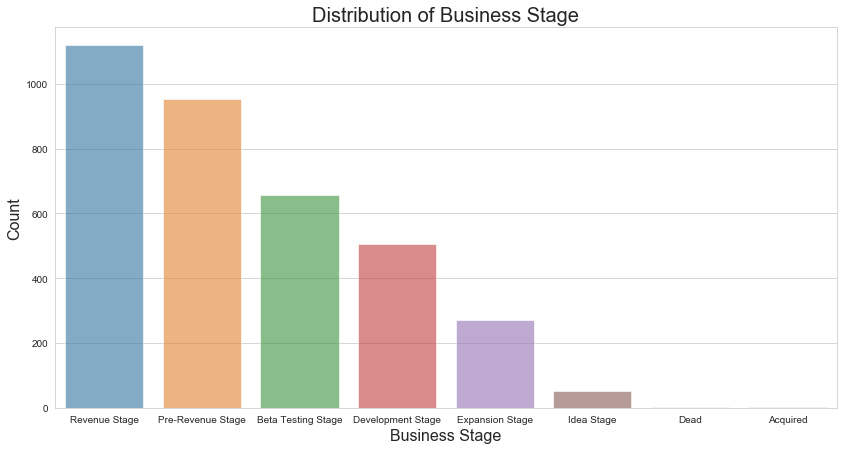

In [269]:
plt.figure(figsize=(14,7))
business_stage = df.business_stage.value_counts()
sns.barplot(y = business_stage.values,
            x = business_stage.index,
            alpha = 0.6);
plt.title('Distribution of Business Stage', fontsize = 20)
plt.xlabel('Business Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)

### 2. Amount to raise, Status of Funding and Funding at Time of Application

In [290]:
df[['amount_to_raise','status_of_funding','funding at the time of application']].describe(include='all')

,amount_to_raise,status_of_funding,funding at the time of application
count,2.392000e+03,4244,3.504000e+03
unique,NaN,17,NaN
top,NaN,NaN,NaN
freq,NaN,1837,NaN
mean,3.423592e+05,NaN,1.031016e+05
std,2.992308e+06,NaN,5.278166e+05
min,0.000000e+00,NaN,0.000000e+00
25%,2.500000e+03,NaN,0.000000e+00
50%,8.000000e+04,NaN,3.075000e+03
75%,3.000000e+05,NaN,7.000000e+04


C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


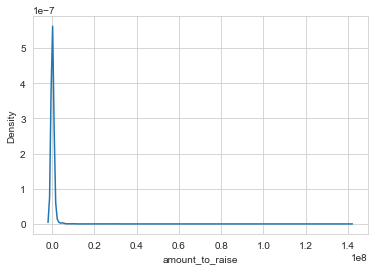

In [299]:
sns.kdeplot(data = df['amount_to_raise'])